## Exploring Cleaning and Wrangling Part 02
### this is starting from new data which includes games played info Sourced from SullyGnome.com


In [1]:
!pip install category_encoders==2.*
!pip install pandas-profiling==2.*

In [2]:
# imports
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install plotly

!{sys.executable} -m pip install collections
!{sys.executable} -m pip install xgboost

from collections import namedtuple
import datetime

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [3]:
### This works but I should create a function that reads in the data.  

In [4]:
# twitch_df = pd.read_csv("twitch_clean_data_Kelly.csv", parse_dates=["Date"])
# twitch_df.head()

In [5]:
pd.set_option('display.max_columns', 130)
pd.set_option('display.max_rows', 130)

In [13]:
def load_twitch_data():
    cols = list(pd.read_csv("twitch_clean_data_Kelly02.csv", nrows=1))
    df = pd.read_csv("twitch_clean_data_Kelly02.csv", parse_dates=["Date"],
                    usecols = [i for i in cols if i !="Unnamed: 71"])
    return df

In [14]:
twitch_df = load_twitch_data()


In [16]:
twitch_df.head()

,Date,player_mode,DST,ONI,Go_Deeper,Chatting,Stardew,DD,Ori_Blind_Forest,Manual_Samuel,Divinity_II,Drawful2,Running_Rifles,Cat_Quest,Cuphead,Hotline_Miami,Terraria,DS,Getting_Over_It,Golf_w_Friends,Escapists2,Human_Fall_Flat,Castle_Crashers,Bridge_Constructor_Portal,Choice_Chamber,KTANE,Doki_Doki,GeoGuessr,Jackbox,We_Were_Here_Too,Stick_Fight,Hacktag,Into_Breach,Portia,Act_it_OutXL,Little Nightmares,Dauntless,Domina,ToS,Surviving_Mars,Way_Out,Move_Die,Hollow_Knight,Spy_Party,Monster_Prom,Shantae_Pirates_Curse,Subnautica,Use_Your_Words,Witch_It,Im_Bread,Agario,Moonlighter,Ultimate_Chicken_Horse,Spelunky,Overcooked2,Graveyard_Keeper,DBD,Amnesia_Dark_Descent,Layers_of_Fear,Borderlands2,Rapture_Rejects,Undertale,Into_the_Breach,Marbles,Tabletop_Sim,2Point_Hospital,Yokus_Island,Slime_Rancher,Secret_Neighbor,Hotline_Miami.1,Cook_Serve_Delicious2,Time_Portia,Griftlands,Stream_Raiders,Yomawari,Darkwood,7D2D,Dream_Daddy,ARK,Stream_Racer,Average Viewers,Chat Messages,Chatters,Clip Views,Clips Created,Follows,Hosts and Raids Viewers (%),Live Views,Max Viewers,Minutes Watched,Minutes Streamed,Unique Viewers,Sub Revenue,Prime Revenue,Gifted Subs Revenue,Bits Revenue,Ad Revenue,Extensions Revenue,Bounties Revenue,Prime Subs,Total Paid Subs,Tier 1 subs,Tier 2 subs,Tier 3 subs,Total Gifted Subs,Gifted Tier 1 subs,Gifted Tier 2 subs,Gifted Tier 3 subs,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,Total_Sub_Revenue,donations,Total_Earnings,streak,activity,avg_message_per_viewer,user_chatting_percent
0,2017-06-13,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.98,114,6,0,0,1,0.0,11,5,480,157,9,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,1,0.033333,12.66666667,66.66666667
1,2017-06-14,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.47,260,9,0,0,2,0.0,35,8,653,192,26,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,2,0.066667,10,34.61538462
2,2017-06-15,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.45,40,3,0,0,2,0.0,1,8,89,20,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,3,0.100000,40,300
3,2017-06-16,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.73,38,5,0,0,2,0.0,17,6,421,115,13,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,4,0.133333,2.923076923,38.46153846
4,2017-06-17,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.99,100,8,0,0,0,0.0,16,7,591,148,12,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,5,0.166667,8.333333333,66.66666667


### Ultimately I need to make a decision about how to split this data.

I think since her followers grow over time, I think the model should be given a random range of dates

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(twitch_df, minimal=True).to_notebook_iframe()

profile

## Wrangle - 
    Date as index 
    Create new streamDateId using David's toordinal
    replace_list = ["inf", "Unknown"]
    twitch_df.fillna(value= 0)

In [18]:
def wrangle_twitch_data02(df):
    # fill the Nans
    df = df.fillna(value= 0)
    
    # replace the unknown game values with 0
    replace_list = ["inf", "Unknown"]
    df= df.replace(to_replace=replace_list, value=0)    
    
    # as a consequence of having strings the columns where not floats.
    # correct that.
    df["user_chatting_percent"]= df["user_chatting_percent"].astype(str).astype(float)
    df["avg_message_per_viewer"]= df["avg_message_per_viewer"].astype(str).astype(float)
    
    ## Create new streamDateId using David's toordinal
    # this basically ordinally encodes the date
    df["stream_date_id"] = df["Date"].map(datetime.datetime.toordinal)

    # change these columns from cat to numerical
    df["Extensions Revenue"]= df["Extensions Revenue"].astype(str).astype(float)  
    df["Bounties Revenue"]= df["Bounties Revenue"].astype(str).astype(float)
    df["Tier 2 subs"]= df["Tier 2 subs"].astype(str).astype(float)
    df["player_mode"]= df["player_mode"].astype(str).astype(float)

    return df
    
    

In [19]:
twitch_df = wrangle_twitch_data02(twitch_df)
twitch_df.head()

,Date,player_mode,DST,ONI,Go_Deeper,Chatting,Stardew,DD,Ori_Blind_Forest,Manual_Samuel,Divinity_II,Drawful2,Running_Rifles,Cat_Quest,Cuphead,Hotline_Miami,Terraria,DS,Getting_Over_It,Golf_w_Friends,Escapists2,Human_Fall_Flat,Castle_Crashers,Bridge_Constructor_Portal,Choice_Chamber,KTANE,Doki_Doki,GeoGuessr,Jackbox,We_Were_Here_Too,Stick_Fight,Hacktag,Into_Breach,Portia,Act_it_OutXL,Little Nightmares,Dauntless,Domina,ToS,Surviving_Mars,Way_Out,Move_Die,Hollow_Knight,Spy_Party,Monster_Prom,Shantae_Pirates_Curse,Subnautica,Use_Your_Words,Witch_It,Im_Bread,Agario,Moonlighter,Ultimate_Chicken_Horse,Spelunky,Overcooked2,Graveyard_Keeper,DBD,Amnesia_Dark_Descent,Layers_of_Fear,Borderlands2,Rapture_Rejects,Undertale,Into_the_Breach,Marbles,Tabletop_Sim,2Point_Hospital,Yokus_Island,Slime_Rancher,Secret_Neighbor,Hotline_Miami.1,Cook_Serve_Delicious2,Time_Portia,Griftlands,Stream_Raiders,Yomawari,Darkwood,7D2D,Dream_Daddy,ARK,Stream_Racer,Average Viewers,Chat Messages,Chatters,Clip Views,Clips Created,Follows,Hosts and Raids Viewers (%),Live Views,Max Viewers,Minutes Watched,Minutes Streamed,Unique Viewers,Sub Revenue,Prime Revenue,Gifted Subs Revenue,Bits Revenue,Ad Revenue,Extensions Revenue,Bounties Revenue,Prime Subs,Total Paid Subs,Tier 1 subs,Tier 2 subs,Tier 3 subs,Total Gifted Subs,Gifted Tier 1 subs,Gifted Tier 2 subs,Gifted Tier 3 subs,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,Total_Sub_Revenue,donations,Total_Earnings,streak,activity,avg_message_per_viewer,user_chatting_percent,stream_date_id
0,2017-06-13,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.98,114,6,0,0,1,0.0,11,5,480,157,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,1,0.033333,12.666667,66.666667,736493
1,2017-06-14,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.47,260,9,0,0,2,0.0,35,8,653,192,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,2,0.066667,10.000000,34.615385,736494
2,2017-06-15,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.45,40,3,0,0,2,0.0,1,8,89,20,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0.0,0.0,3,0.100000,40.000000,300.000000,736495
3,2017-06-16,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.73,38,5,0,0,2,0.0,17,6,421,115,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,4,0.133333,2.923077,38.461538,736496
4,2017-06-17,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.99,100,8,0,0,0,0.0,16,7,591,148,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,5,0.166667,8.333333,66.666667,736497


In [20]:
twitch_df.columns


Index(['Date', 'player_mode', 'DST', 'ONI', 'Go_Deeper', 'Chatting', 'Stardew',
       'DD', 'Ori_Blind_Forest', 'Manual_Samuel',
       ...
       'day_of_week_6', 'day_of_week_7', 'Total_Sub_Revenue', 'donations',
       'Total_Earnings', 'streak', 'activity', 'avg_message_per_viewer',
       'user_chatting_percent', 'stream_date_id'],
      dtype='object', length=123)

In [22]:
twitch_df.isnull().sum()

Date                           0
player_mode                    0
DST                            0
ONI                            0
Go_Deeper                      0
Chatting                       0
Stardew                        0
DD                             0
Ori_Blind_Forest               0
Manual_Samuel                  0
Divinity_II                    0
Drawful2                       0
Running_Rifles                 0
Cat_Quest                      0
Cuphead                        0
Hotline_Miami                  0
Terraria                       0
DS                             0
Getting_Over_It                0
Golf_w_Friends                 0
Escapists2                     0
Human_Fall_Flat                0
Castle_Crashers                0
Bridge_Constructor_Portal      0
Choice_Chamber                 0
KTANE                          0
Doki_Doki                      0
GeoGuessr                      0
Jackbox                        0
We_Were_Here_Too               0
Stick_Figh

In [23]:
twitch_df.shape

(1159, 123)

In [27]:
# This is how many times a game was streamed.  I should plot this.  
twitch_df.loc[:, "DST":"Stream_Racer"].sum().sort_values(ascending=False)

DST                          320.0
Jackbox                      205.0
Chatting                     164.0
Drawful2                     117.0
Stardew                       79.0
7D2D                          58.0
DD                            27.0
Subnautica                    24.0
Hollow_Knight                 21.0
Cuphead                       20.0
ARK                           15.0
Graveyard_Keeper              13.0
Use_Your_Words                12.0
Choice_Chamber                11.0
ONI                            8.0
Marbles                        8.0
Terraria                       7.0
Moonlighter                    6.0
Escapists2                     6.0
Dream_Daddy                    6.0
Shantae_Pirates_Curse          5.0
Time_Portia                    5.0
Secret_Neighbor                4.0
Amnesia_Dark_Descent           4.0
Move_Die                       4.0
Into_the_Breach                4.0
Overcooked2                    4.0
GeoGuessr                      4.0
Getting_Over_It     

In [51]:
# turn this into a list so I can zip and turn into a df
game_columns = list(twitch_df.loc[:, "DST":"Stream_Racer"].columns)

In [52]:
game_columns

['DST',
 'ONI',
 'Go_Deeper',
 'Chatting',
 'Stardew',
 'DD',
 'Ori_Blind_Forest',
 'Manual_Samuel',
 'Divinity_II',
 'Drawful2',
 'Running_Rifles',
 'Cat_Quest',
 'Cuphead',
 'Hotline_Miami',
 'Terraria',
 'DS',
 'Getting_Over_It',
 'Golf_w_Friends',
 'Escapists2',
 'Human_Fall_Flat',
 'Castle_Crashers',
 'Bridge_Constructor_Portal',
 'Choice_Chamber',
 'KTANE',
 'Doki_Doki',
 'GeoGuessr',
 'Jackbox',
 'We_Were_Here_Too',
 'Stick_Fight',
 'Hacktag',
 'Into_Breach',
 'Portia',
 'Act_it_OutXL',
 'Little Nightmares',
 'Dauntless',
 'Domina',
 'ToS',
 'Surviving_Mars',
 'Way_Out',
 'Move_Die',
 'Hollow_Knight',
 'Spy_Party',
 'Monster_Prom',
 'Shantae_Pirates_Curse',
 'Subnautica',
 'Use_Your_Words',
 'Witch_It',
 'Im_Bread',
 'Agario',
 'Moonlighter',
 'Ultimate_Chicken_Horse',
 'Spelunky',
 'Overcooked2',
 'Graveyard_Keeper',
 'DBD',
 'Amnesia_Dark_Descent',
 'Layers_of_Fear',
 'Borderlands2',
 'Rapture_Rejects',
 'Undertale',
 'Into_the_Breach',
 'Marbles',
 'Tabletop_Sim',
 '2Point_Ho

In [53]:
g_data = list(twitch_df.loc[:, "DST":"Stream_Racer"].sum())
g_data

[320.0,
 8.0,
 3.0,
 164.0,
 79.0,
 27.0,
 1.0,
 1.0,
 1.0,
 117.0,
 1.0,
 3.0,
 20.0,
 1.0,
 7.0,
 1.0,
 4.0,
 1.0,
 6.0,
 3.0,
 2.0,
 1.0,
 11.0,
 2.0,
 2.0,
 4.0,
 205.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 3.0,
 3.0,
 2.0,
 2.0,
 2.0,
 2.0,
 4.0,
 21.0,
 1.0,
 1.0,
 5.0,
 24.0,
 12.0,
 1.0,
 1.0,
 2.0,
 6.0,
 2.0,
 2.0,
 4.0,
 13.0,
 3.0,
 4.0,
 2.0,
 1.0,
 1.0,
 3.0,
 4.0,
 8.0,
 2.0,
 2.0,
 1.0,
 3.0,
 4.0,
 1.0,
 1.0,
 5.0,
 2.0,
 2.0,
 3.0,
 2.0,
 58.0,
 6.0,
 15.0,
 1.0]

In [56]:
game_count_tuple = list(zip(game_columns, g_data))

In [ ]:
game_count_tuple

In [70]:
game_freq_df = pd.DataFrame(game_count_tuple, columns=["Game", "Days"])

In [71]:
game_freq_df.shape

(78, 2)

<AxesSubplot:ylabel='Game'>

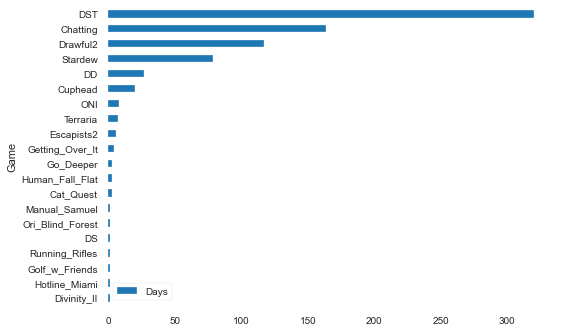

In [96]:
game_freq_df.set_index("Game").head(20).sort_values(by="Days").plot.barh()

In [ ]:
# I should change all other games to other.

In [ ]:
profile

In [ ]:
temp_df = twitch_df.copy()

In [ ]:
# twitch_df["Extensions Revenue"]= twitch_df["Extensions Revenue"].astype(str).astype(float)

In [ ]:
# twitch_df["Bounties Revenue"]= twitch_df["Bounties Revenue"].astype(str).astype(float)

In [ ]:
# twitch_df["Tier 2 subs"]= twitch_df["Tier 2 subs"].astype(str).astype(float)

In [ ]:
twitch_df.info()

In [ ]:
twitch_df.describe(include="all")

In [ ]:
# I need to identify days that were single player, multiplayer, or both.  
# I will hardcode this into the twitch_clean_data_Kelly

In [97]:
twitch_df.nunique()

Date                           1158
player_mode                       4
DST                               2
ONI                               2
Go_Deeper                         2
Chatting                          2
Stardew                           2
DD                                2
Ori_Blind_Forest                  2
Manual_Samuel                     2
Divinity_II                       2
Drawful2                          2
Running_Rifles                    2
Cat_Quest                         2
Cuphead                           2
Hotline_Miami                     2
Terraria                          2
DS                                2
Getting_Over_It                   2
Golf_w_Friends                    2
Escapists2                        2
Human_Fall_Flat                   2
Castle_Crashers                   2
Bridge_Constructor_Portal         2
Choice_Chamber                    2
KTANE                             2
Doki_Doki                         2
GeoGuessr                   

In [ ]:
# temp_df = pd.DataFrame()
# temp_df["stream_date_id"] = twitch_df["Date"].map(datetime.datetime.toordinal)
# temp_df.head()

In [ ]:
twitch_df['Total_Earnings'].hist(bins=50);

In [ ]:
# lets get an average sales price
guess_price = twitch_df['Total_Earnings'].mean()
guess_price

In [ ]:
# make function that will do it for us
def get_naive_baseline(target_feature):
  guess = target_feature.mean()
  errors = guess - target_feature
  mean_absolute_error = errors.abs().mean()

  naive_baseline = namedtuple("baseline_info", ["guess", "errors", "MAE"])

  return naive_baseline(guess, errors, mean_absolute_error)

In [ ]:
nbaseline = get_naive_baseline(twitch_df['Total_Earnings'])

In [ ]:
y_target = twitch_df['Total_Earnings']

In [ ]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")

In [ ]:
twitch_df["avg_message_per_viewer"].isnull().sum()

In [ ]:
# print("Baseline MAE:\n", mean_absolute_error(df['price'], [df['price'].mean()]*400716))
# print("Baseline RMSE:\n", math.sqrt(mean_absolute_error(twitch_df['Total_Earnings']),
#                         twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings'].iloc[:,0])))
# print('\nTraining MAE:\n', mean_absolute_error(y_train, boost_model.predict(X_train)))

In [ ]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# print("Baseline MAE:\n", mean_absolute_error(df['price'], [df['price'].mean()]*len(df['price'])))
print("Baseline RMSE:\n", math.sqrt(mean_absolute_error(twitch_df['Total_Earnings'],
                        [twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings']))))

In [ ]:
print(nbaseline.guess)
print(nbaseline.MAE)
print(nbaseline.errors.shape)

In [ ]:
# # make function that will do it for us
# def get_naive_baseline(target_feature):
#   guess = target_feature.mean()
#   errors = guess - target_feature
#   mean_absolute_error = errors.abs().mean()

# #   y_pred = [target_feature.mean()] * len(target_feature.iloc[:,0])
#   r2 = r2_score(target_feature, y_pred)

#   naive_baseline = namedtuple("baseline_info", ["guess", "errors", "MAE", "R2"])

#   return naive_baseline(guess, errors, mean_absolute_error, r2)

In [ ]:
nbaseline = get_naive_baseline(twitch_df['Total_Earnings'])

In [ ]:
nbaseline

In [ ]:
twitch_df['Total_Earnings'].mean()

In [ ]:
# a= twitch_df['Total_Earnings'] *twitch_df['Total_Earnings'].mean()
# a

In [ ]:
y_pred = [twitch_df["Total_Earnings"].mean()] * len(twitch_df["Total_Earnings"])
y_pred

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
mean_squared_error(y_target, y_pred)

In [ ]:
r2 = r2_score(y_target, y_pred)
print(r2)

In [ ]:
np.set_printoptions(threshold=sys.maxsize)
twitch_df.columns[0:90]

In [ ]:
twitch_df.


# short list a Feature Matrix
short_list = ['Average Viewers', 'Chat Messages', 'Chatters', 'Clip Views',
       'Clips Created', 'Follows', 'Hosts and Raids Viewers (%)', 'Live Views',
       'Max Viewers', 'Minutes Watched', 'Minutes Streamed', 'Unique Viewers',
         'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'day_of_week_7',
        'Total_Earnings', 'streak', 'avg_message_per_viewer',
        'activity', 'user_chatting_percent','Total_Earnings']

In [ ]:
# short_list = ['Average Viewers', 'Chat Messages', 'Chatters',
#               'Follows', 'Hosts and Raids Viewers (%)', 'Live Views',
#        'Max Viewers', 'Minutes Streamed', 'Unique Viewers',
#          'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
#        'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'day_of_week_7',
#         'Total_Earnings', 'streak', 'avg_message_per_viewer',
#         'activity', 'user_chatting_percent']

In [ ]:
long_list = ['DST', 'ONI', 'Go_Deeper', 'Chatting', 'Stardew', 'DD',
       'Ori_Blind_Forest', 'Manual_Samuel', 'Divinity_II', 'Drawful2',
       'Running_Rifles', 'Cat_Quest', 'Cuphead', 'Hotline_Miami', 'Terraria',
       'DS', 'Getting_Over_It', 'Golf_w_Friends', 'Escapists2',
       'Human_Fall_Flat', 'Castle_Crashers', 'Bridge_Constructor_Portal',
       'Choice_Chamber', 'KTANE', 'Doki_Doki', 'GeoGuessr', 'Jackbox',
       'We_Were_Here_Too', 'Stick_Fight', 'Hacktag', 'Into_Breach', 'Portia',
       'Act_it_OutXL', 'Little Nightmares', 'Dauntless', 'Domina', 'ToS',
       'Surviving_Mars', 'Way_Out', 'Move_Die', 'Hollow_Knight', 'Spy_Party',
       'Monster_Prom', 'Shantae_Pirates_Curse', 'Subnautica', 'Use_Your_Words',
       'Witch_It', 'Im_Bread', 'Agario', 'Moonlighter',
       'Ultimate_Chicken_Horse', 'Spelunky', 'Overcooked2', 'Graveyard_Keeper',
       'DBD', 'Amnesia_Dark_Descent', 'Layers_of_Fear', 'Borderlands2',
       'Rapture_Rejects', 'Undertale', 'Into_the_Breach', 'Marbles',
       'Tabletop_Sim', '2Point_Hospital', 'Yokus_Island', 'Slime_Rancher',
       'Secret_Neighbor', 'Hotline_Miami.1', 'Cook_Serve_Delicious2',
        'Time_Portia', 'Griftlands', 'Stream_Raiders',
       'Yomawari', 'Darkwood', '7D2D', 'Dream_Daddy', 'ARK', 'Stream_Racer',
       'Average Viewers', 'Chat Messages', 'Chatters',
        'Follows', 'Hosts and Raids Viewers (%)', 'Live Views',
        'Max Viewers', 'Minutes Streamed', 'Unique Viewers',
         'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
         'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'day_of_week_7',
        'Total_Earnings', 'streak', 'avg_message_per_viewer',
        'activity', 'user_chatting_percent']

In [ ]:
# feature_matrix_df = twitch_df[short_list]
feature_matrix_df = twitch_df[long_list]

In [ ]:
# Make a function to create Matrix and Target pre validation split
def create_Xmatrix_ytarget(training_df):
  y_target = training_df["Total_Earnings"]
  X_matrix = training_df.drop("Total_Earnings", axis=1)
  return (X_matrix, y_target)

In [ ]:
X_matrix, y_target = create_Xmatrix_ytarget(feature_matrix_df)
print(X_matrix.shape)
print(y_target.shape)

# Train Val Test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(
    X_matrix, y_target, train_size=0.80, test_size=0.20, random_state=42)

In [ ]:
print(X_train_temp.shape)
print(y_train_temp.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_temp, y_train_temp, train_size=0.80, test_size=0.20, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

# Let's make a pipeline!  (finally...!)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest

In [ ]:
lr_model = make_pipeline(
    SelectKBest(),
    LinearRegression()
)

### Short list transforms - SelectKBest, 

In [ ]:
lr_model.fit(X_train, y_train)

In [ ]:
training_MAE = mean_absolute_error(y_train, lr_model.predict(X_train))

In [ ]:
validation_MAE = mean_absolute_error(y_val, lr_model.predict(X_val))

In [ ]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")
print("Baseline RMSE:\n", math.sqrt(mean_absolute_error(twitch_df['Total_Earnings'],
                        [twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings']))))
print(f"Training MAE: {training_MAE}")
print(f"Validation MAE: {validation_MAE}")

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_bag_model = make_pipeline(
    RandomForestRegressor(random_state=42)
)

In [ ]:
rf_bag_model.fit(X_train, y_train)

In [ ]:
training_MAE = mean_absolute_error(y_train, rf_bag_model.predict(X_train))

In [ ]:
validation_MAE = mean_absolute_error(y_val, rf_bag_model.predict(X_val))

In [ ]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")
print("Baseline RMSE:\n", math.sqrt(mean_absolute_error(twitch_df['Total_Earnings'],
                        [twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings']))))
print(f"Training MAE: {training_MAE}")
print(f"Validation MAE: {validation_MAE}")

In [ ]:
response_var_column03 = rf_bag_model.predict(X_train)
model_rsme03 = mean_squared_error(y_train, response_var_column03, squared=False)
model_r2_03 = r2_score(y_train, response_var_column03)

In [ ]:
print(f"Model RMSE: {model_rsme03}")
print(f"Model R^2: {model_r2_03}")

## try the GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
rf_boost_model = make_pipeline(
    GradientBoostingRegressor(random_state=42)
)

rf_boost_model.fit(X_train, y_train)

In [ ]:
training_MAE2 = mean_absolute_error(y_train, rf_boost_model.predict(X_train))

In [ ]:
validation_MAE2 = mean_absolute_error(y_val, rf_boost_model.predict(X_val))

In [ ]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")
print("Baseline RMSE:\n", math.sqrt(mean_absolute_error(twitch_df['Total_Earnings'],
                        [twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings']))))
print(f"Training MAE: {training_MAE2}")
print(f"Validation MAE: {validation_MAE2}")

In [ ]:
response_var_column = rf_boost_model.predict(X_train)
model_rsme = mean_squared_error(y_train, response_var_column, squared=False)
model_r2 = r2_score(y_train, response_var_column)



In [ ]:
print(f"Model RMSE: {model_rsme}")
print(f"Model R^2: {model_r2}")

 ### Try XGBoost
 

In [ ]:

from xgboost import XGBRegressor

In [ ]:
xgb_model = make_pipeline(
   XGBRegressor()
)
xgb_model.fit(X_train, y_train)

In [ ]:
training_MAE07 = mean_absolute_error(y_train, xgb_model.predict(X_train))

In [ ]:
validation_MAE07 = mean_absolute_error(y_val, xgb_model.predict(X_val))

In [ ]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")
print("Baseline RMSE:\n", math.sqrt(mean_absolute_error(twitch_df['Total_Earnings'],
                        [twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings']))))
print(f"Training MAE: {training_MAE07}")
print(f"Validation MAE: {validation_MAE07}")

In [ ]:
response_var_column02 = xgb_model.predict(X_train)
model_rsme02 = mean_squared_error(y_train, response_var_column02, squared=False)
model_r2_02 = r2_score(y_train, response_var_column02)

In [ ]:
print(f"Model RMSE: {model_rsme02}")
print(f"Model R^2: {model_r2_02}")

## Feature Importances

In [ ]:
# rf_bag_model = make_pipeline(
#     RandomForestRegressor(random_state=42)
# )

In [ ]:
# rf_bag_model.fit(X_train, y_train)

In [ ]:
fi= rf_bag_model.named_steps["randomforestregressor"].feature_importances_

In [ ]:
importances = pd.Series(fi, X_train.columns).sort_values(ascending=False)
importances

In [ ]:
importances.head(30).plot(kind="barh")

## Drop Column

### Permutation IMportance
train model on full dataset
Choose a column an shuffle rows
See how the validation metrics change

In [ ]:
X_val["activity"].head(10)

In [ ]:
X_val_permuted = X_val.copy()

In [ ]:
np.random.permutation(X_val["activity"])[:10]

In [ ]:
X_val_permuted["activity"] = np.random.permutation(X_val_permuted["activity"])

In [ ]:
X_val_permuted["activity"].head(10)

In [ ]:
X_val_permuted["activity"].value_counts()

In [ ]:
X_val["activity"].value_counts()

In [ ]:
rf_boost_model2 = make_pipeline(
    GradientBoostingRegressor(random_state=42)
)

rf_boost_model2.fit(X_train, y_train)

In [ ]:
validation_MAE2 = mean_absolute_error(y_val, rf_boost_model2.predict(X_val))

In [ ]:
validation_MAE3 = mean_absolute_error(y_val, rf_boost_model2.predict(X_val_permuted))

In [ ]:
training_MAE2 = mean_absolute_error(y_train, rf_boost_model2.predict(X_train))

In [ ]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")
print(f"Training MAE: {training_MAE2}")
print(f"Validation MAE: {validation_MAE2}")
print(f"Validation MAE Permuted: {validation_MAE3}")

### Automate it. 

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
pi = permutation_importance(rf_boost_model2, X_val, y_val)

In [ ]:
type(pi)

In [ ]:
pi

In [ ]:
pi_df = pd.DataFrame({"importances_mean": np.round(pi["importances_mean"], 4),
                     "importances_std": pi["importances_std"]},
                    index=X_val.columns)

In [ ]:
pi_df.sort_values(by="importances_mean", ascending=False)

### Compare Permutation importance (top 15) with SelectKBest(Default)

In [ ]:
perm_shortlist = pi_df.sort_values(by="importances_mean", ascending=False).head(33).index

In [ ]:
perm_shortlist

In [ ]:
lr_perm_model = make_pipeline(
    LinearRegression()
)

lr_perm_model.fit(X_train[perm_shortlist], y_train)

In [ ]:
training_MAE4 = mean_absolute_error(y_train, lr_perm_model.predict(X_train[perm_shortlist]))

In [ ]:
validation_MAE4 = mean_absolute_error(y_val, lr_perm_model.predict(X_val[perm_shortlist]))

## original lr w/ SelectKBest

In [ ]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")
print("Baseline RMSE:\n", math.sqrt(mean_absolute_error(twitch_df['Total_Earnings'],
                        [twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings']))))
print(f"Training MAE: {training_MAE}")
print(f"Validation MAE: {validation_MAE}")

## lr w/ Perm Importance Shortlist

In [ ]:
print(f"If we estimated Total Earnings at ${nbaseline.guess},")
print(f"we would be off by ${nbaseline.MAE} on average.")
print("Baseline RMSE:\n", math.sqrt(mean_absolute_error(twitch_df['Total_Earnings'],
                        [twitch_df['Total_Earnings'].mean()]*len(twitch_df['Total_Earnings']))))
print(f"Training MAE: {training_MAE4}")
print(f"Validation MAE: {validation_MAE4}")